## [作業重點]
使用 Sklearn 中的線性迴歸模型，來訓練各種資料集，務必了解送進去模型訓練的**資料型態**為何，也請了解模型中各項參數的意義

## 作業
試著使用 sklearn datasets 的其他資料集 (wine, boston, ...)，來訓練自己的線性迴歸模型。

### HINT: 注意 label 的型態，確定資料集的目標是分類還是回歸，在使用正確的模型訓練！

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.exceptions import DataConversionWarning

import warnings
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
np.warnings.filterwarnings('ignore')

In [3]:
# 讀取糖尿病資料集
boston_houses = datasets.load_boston()

# 為方便視覺化，我們只使用資料集中的 1 個 feature (column)
X = boston_houses.data[:, np.newaxis, 2]
print("Data shape: ", X.shape) # 可以看見有 442 筆資料與我們取出的其中一個 feature

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(X, boston_houses.target, test_size=0.1, random_state=4)

# 建立一個線性回歸模型
regr = linear_model.LinearRegression()

# 將訓練資料丟進去模型訓練
regr.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = regr.predict(x_test)

('Data shape: ', (506, 1))


In [4]:
# 可以看回歸模型的參數值
print('Coefficients: ', regr.coef_)

# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

('Coefficients: ', array([-0.64959885]))
Mean squared error: 63.06


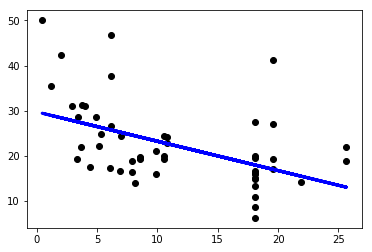

In [5]:
# 畫出回歸模型與實際資料的分佈
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_pred, color='blue', linewidth=3)
plt.show()

In [6]:
# 將房價分為10個區間
bins = np.linspace(boston_houses.target.min(), boston_houses.target.max(), 11)
y_train_dig = np.digitize(y_train, bins)
y_test_dig = np.digitize(y_test, bins)

In [7]:
# 建立模型
logreg = linear_model.LogisticRegression()

# 訓練模型
logreg.fit(x_train, y_train_dig)

# 預測測試集
y_pred = logreg.predict(x_test)

In [8]:
acc = accuracy_score(y_test_dig, y_pred)
print("Accuracy: ", acc)

('Accuracy: ', 0.3137254901960784)


In [9]:
# 可以看回歸模型的參數值
print('Coefficients: ', logreg.coef_)

('Coefficients: ', array([[ 0.10148479],
       [ 0.13085267],
       [ 0.09780833],
       [-0.02135046],
       [-0.07032884],
       [-0.16450978],
       [-0.45935972],
       [-0.60751794],
       [-0.36094024],
       [-0.55474175],
       [-0.01405528]]))
